# table

In [1]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["solve null values on number data", "repeated values", "skwnness","normalization","one hot encoding"]
table.add_row(["I choose to drop columns had null values above 71%, less than 12 with median and others with miss forest", "made threshold 80%","log tranformer","I used MinMaxScaler","I used label encoding for unique value less than 2 and one hot encoding for more than 2"])


# approch

In [2]:
print(table)

+----------------------------------------------------------------------------------------------------------+--------------------+----------------+---------------------+-----------------------------------------------------------------------------------------+
|                                     solve null values on number data                                     |  repeated values   |    skwnness    |    normalization    |                                     one hot encoding                                    |
+----------------------------------------------------------------------------------------------------------+--------------------+----------------+---------------------+-----------------------------------------------------------------------------------------+
| I choose to drop columns had null values above 71%, less than 12 with median and others with miss forest | made threshold 80% | log tranformer | I used MinMaxScaler | I used label encoding for unique value less than 2 and

# imports

In [7]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
import numpy as np
from missforest import MissForest


# showing data

In [8]:
data=pd.read_csv("left_app_data.csv")
data.head()

,SK_ID_CURR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,WALLSMATERIAL_MODE,TARGET,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,NAME_CONTRACT_TYPE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,DAYS_DECISION_mean_previous_app_data,CNT_PAYMENT_mean_previous_app_data,DAYS_FIRST_DRAWING_mean_previous_app_data,DAYS_FIRST_DUE_mean_previous_app_data,DAYS_LAST_DUE_1ST_VERSION_mean_previous_app_data,DAYS_LAST_DUE_mean_previous_app_data,DAYS_TERMINATION_mean_previous_app_data,NFLAG_INSURED_ON_APPROVAL_mean_previous_app_data,HOUR_APPR_PROCESS_START_mean_previous_app_data,NFLAG_LAST_APPL_IN_DAY_mean_previous_app_data,AMT_ANNUITY_mean_previous_app_data,AMT_APPLICATION_mean_previous_app_data,AMT_CREDIT_mean_previous_app_data,AMT_DOWN_PAYMENT_mean_previous_app_data,AMT_GOODS_PRICE_mean_previous_app_data,RATE_DOWN_PAYMENT_mean_previous_app_data,RATE_INTEREST_PRIMARY_mean_previous_app_data,RATE_INTEREST_PRIVILEGED_mean_previous_app_data,Cash_loans_from__contract_from_previous_table,Consumer_loans_from_contract_from_previous_table,Revolving_loans_from_contract_from_previous_table,XNA_from_contract_from_previous_table_x,N_loans_from_FLAG_LAST_APPL_PER_CONTRACT_from_previous_table,Y_from__FLAG_LAST_APPL_PER_CONTRACT_from_previous_table,Approved_from__contract_from_previous_table,Canceled_loans_from_contract_from_previous_table,Refused_from_contract_from_previous_table,Unused offer_from_contract_from_previous_table,Cash through the bank,Cashless from the account of the employer_name_from_contract_from_previous_table,Non-cash from your account_from_name_contract_from_previous_table,XNA_from_name_contract_from_previous_table,XNA_from__NAME_PRODUCT_TYPE_from_previous_table,walk_in_from_NAME_PRODUCT_TYPE_from_previous_table,x-sell_from_NAME_PRODUCT_TYPE_from_previous_table,XNA_from__NAME_YIELD_GROUP_from_previous_table,high_from_NAME_YIELD_GROUP_from_previous_table,low_action_from_NAME_YIELD_GROUP_from_previous_table,low_normal_from_NAME_YIELD_GROUP_from_previous_table,middle_from_NAME_YIELD_GROUP_from_previous_table,SK_DPD_std_pos_data,SK_DPD_DEF_std_pos_data,CNT_INSTALMENT_FUTURE_std_pos_data,CNT_INSTALMENT_mean_pos_data,MONTHS_BALANCE_max_pos_data,Active_contract_status_pos_table,Amortized_contract_status_pos_table,Approved_contract_status_pos_table,Canceled_contract_status_pos_table,Completed_contract_status_pos_table,Demand_contract_status_pos_table,Returned_contract_status_pos_table,Signed,XNA_from_contract_from_previous_table_y,DAYS_INSTALMENT_std_installments_payments,DAYS_ENTRY_PAYMENT_std_installments_payments,NUM_INSTALMENT_NUMBER_count_installments_payments,NUM_INSTALMENT_VERSION_nunique_installments_payments,AMT_INSTALMENT_sum_installments_payments,AMT_PAYMENT_sum_installments_payments,Active_contract_status_credit_table,Approved_contract_status_credit_table,Completed_contract_status_credit_table,Demand_contract_status_credit_table,Refused_contract_status_credit_table,prposal_contract_status_credit_table,Signed_contract_status_credit_table,MONTHS_BALANCE_max_credit_data,CNT_INSTALMENT_MA

In [9]:
number_data=data.select_dtypes(["int64","float64"])

In [10]:
number_data.shape

(307511, 140)

In [11]:
number_data.isnull().sum()

SK_ID_CURR                                                                               0
CNT_CHILDREN                                                                             0
DAYS_BIRTH                                                                               0
DAYS_EMPLOYED                                                                            0
DAYS_ID_PUBLISH                                                                          0
FLAG_PHONE                                                                               0
REGION_RATING_CLIENT                                                                     0
REGION_RATING_CLIENT_W_CITY                                                              0
HOUR_APPR_PROCESS_START                                                                  0
REG_CITY_NOT_WORK_CITY                                                                   0
FLAG_DOCUMENT_3                                                                          0

In [12]:
cat_data=data.select_dtypes(["object"])

In [13]:
cat_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,WALLSMATERIAL_MODE,NAME_CONTRACT_TYPE
0,M,N,Y,Working,Secondary / secondary special,Single / not married,Laborers,WEDNESDAY,Business Entity Type 3,"Stone, brick",Cash loans
1,F,N,N,State servant,Higher education,Married,Core staff,MONDAY,School,Block,Cash loans
2,M,Y,Y,Working,Secondary / secondary special,Single / not married,Laborers,MONDAY,Government,Panel,Revolving loans
3,F,N,Y,Working,Secondary / secondary special,Civil marriage,Laborers,WEDNESDAY,Business Entity Type 3,Panel,Cash loans
4,M,N,Y,Working,Secondary / secondary special,Single / not married,Core staff,THURSDAY,Religion,Panel,Cash loans


# solve null value

In [14]:
total_rows=number_data.shape[0]
null_data = number_data.isna().sum().reset_index().rename(columns = {0: "Nulls_Count", "index": "Column_Name"}).sort_values(by="Nulls_Count", ascending=False)
null_data['Percentage']=(null_data['Nulls_Count']/total_rows)*100
null_data[null_data["Nulls_Count"] > 0]

,Column_Name,Nulls_Count,Percentage
70,RATE_INTEREST_PRIVILEGED_mean_previous_app_data,302902,98.501192
69,RATE_INTEREST_PRIMARY_mean_previous_app_data,302902,98.501192
131,AMT_PAYMENT_CURRENT_mean_credit_data,246451,80.143800
138,CNT_DRAWINGS_OTHER_CURRENT_mean_credit_data,246371,80.117784
136,CNT_DRAWINGS_ATM_CURRENT_mean_credit_data,246371,80.117784
129,AMT_DRAWINGS_POS_CURRENT_mean_credit_data,246371,80.117784
128,AMT_DRAWINGS_OTHER_CURRENT_mean_credit_data,246371,80.117784
126,AMT_DRAWINGS_ATM_CURRENT_mean_credit_data,246371,80.117784
139,CNT_DRAWINGS_POS_CURRENT_mean_credit_data,246371,80.117784
123,SK_DPD_DEF_std_credit_data,221238,71.944743


In [15]:
for col, percentage in zip(null_data['Column_Name'], null_data['Percentage']):
    if percentage <= 12:
        number_data[col] = number_data[col].fillna(number_data[col].median())
    elif percentage > 72:
        number_data = number_data.drop(columns=[col])




In [16]:
data_clean_of_null = number_data
total_rows=data_clean_of_null.shape[0]
null_data = data_clean_of_null.isna().sum().reset_index().rename(columns = {0: "Nulls_Count", "index": "Column_Name"}).sort_values(by="Nulls_Count", ascending=False)
null_data['Percentage']=(null_data['Nulls_Count']/total_rows)*100
null_data[null_data["Nulls_Count"] > 0]

,Column_Name,Nulls_Count,Percentage
120,SK_DPD_std_credit_data,221238,71.944743
121,SK_DPD_DEF_std_credit_data,221238,71.944743
130,CNT_DRAWINGS_CURRENT_mean_credit_data,220606,71.739222
111,Active_contract_status_credit_table,220606,71.739222
112,Approved_contract_status_credit_table,220606,71.739222
113,Completed_contract_status_credit_table,220606,71.739222
114,Demand_contract_status_credit_table,220606,71.739222
115,Refused_contract_status_credit_table,220606,71.739222
117,Signed_contract_status_credit_table,220606,71.739222
118,MONTHS_BALANCE_max_credit_data,220606,71.739222


In [17]:

mf = MissForest()
mf.fit(data_clean_of_null)

train_imputed = mf.transform(data_clean_of_null)




c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\missforest\missforest.py:318: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
 40%|████      | 2/5 [16:59<25:38, 512.78s/it]c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\missforest\missforest.py:288: UserWarning: NRMSE increased.
  warnings.warn("NRMSE increased.")
c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\missforest\missforest.py:429: UserWarning: Stopping criterion triggered during fitting. Before last imputation matrix will be returned.
  warnings.warn(
 40%|████      | 2/5 [25:34<38:21, 767.14s/it]
c:\Users\youss\AppData\Local\Programs\Python\Python312\Lib\site-packages\missforest\missforest.py:462: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical 

In [18]:
number_data_imputed = pd.DataFrame(train_imputed, columns=number_data.columns, index=train_imputed.index)

print(number_data_imputed.isnull().sum())

SK_ID_CURR                                                                          0
CNT_CHILDREN                                                                        0
DAYS_BIRTH                                                                          0
DAYS_EMPLOYED                                                                       0
DAYS_ID_PUBLISH                                                                     0
FLAG_PHONE                                                                          0
REGION_RATING_CLIENT                                                                0
REGION_RATING_CLIENT_W_CITY                                                         0
HOUR_APPR_PROCESS_START                                                             0
REG_CITY_NOT_WORK_CITY                                                              0
FLAG_DOCUMENT_3                                                                     0
AMT_INCOME_TOTAL                                      

In [19]:
new_app_data=pd.concat([number_data_imputed,cat_data],axis=1)

# repeated data

In [20]:
column_drop=["TARGET","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","NAME_CONTRACT_TYPE"
            ,"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK"]
x=new_app_data.drop(columns=column_drop,axis=1)
y=new_app_data[column_drop]

In [21]:
def dropping_var_wth_same_value_80_time(count_df, df):
    highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
    if highest_freq_percentage >= 0.8:
        print('we will drop the column ', count_df.columns[0])
        df = df.drop(columns = [count_df.columns[0]])
    return df
df_list = []
for col in list(set(x.columns) - set(['SK_ID_CURR'])):
    df_list.append(x.groupby([col])['SK_ID_CURR'].count().reset_index().rename(columns = {'SK_ID_CURR' : 'count'}))


In [22]:
for idx in range(len(df_list)):
    print(idx)
    x = dropping_var_wth_same_value_80_time(df_list[idx], x)

0
1


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


2
3


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


we will drop the column  Approved_contract_status_pos_table
4


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


we will drop the column  XNA_from_contract_from_previous_table_y
5


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


we will drop the column  Unused offer_from_contract_from_previous_table
6


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


7
8


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


9
10


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


11
12


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


13
14


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


15
16


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


17
18


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


19
20


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


21
22


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


23
24


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


25
26


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


27
28


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


29
30


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


31
32


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


33
34


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


we will drop the column  Non-cash from your account_from_name_contract_from_previous_table
35
36


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


37
we will drop the column  Demand_contract_status_pos_table
38


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


39
40


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


41
42


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


we will drop the column  DAYS_FIRST_DRAWING_mean_previous_app_data
43
44
45


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


we will drop the column  Canceled_contract_status_pos_table
46
47


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


48
49


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


50
51


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


52
53


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


54
55


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


56
57


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


58
59


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


60
we will drop the column  Signed
61


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


62
63


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


we will drop the column  N_loans_from_FLAG_LAST_APPL_PER_CONTRACT_from_previous_table
64


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


65
66


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


67
68


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


69
70


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


71
72


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


73
74


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


75
76


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


77
78


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


79
80


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


81
82


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


83
84


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


85
86


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


87
88


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


89
90


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


91
92
93


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


94
95


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


we will drop the column  Returned_contract_status_pos_table
96


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


97
98


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


99
100


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


101
we will drop the column  XNA_from_contract_from_previous_table_x
102
103


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


104
105


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


106
107


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


108
109


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


110
111


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


we will drop the column  SK_DPD_std_pos_data
112


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


113
we will drop the column  Amortized_contract_status_pos_table
114
115


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


116
117


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


118
we will drop the column  low_action_from_NAME_YIELD_GROUP_from_previous_table


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


119
120


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


121
122


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


we will drop the column  SK_DPD_DEF_std_pos_data
123


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


124
we will drop the column  Cashless from the account of the employer_name_from_contract_from_previous_table
125


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


126
127


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


128
129


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


130


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


131
132


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


we will drop the column  NFLAG_LAST_APPL_IN_DAY_mean_previous_app_data
133


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\4280369097.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highest_freq_percentage = (count_df['count']/df.count()[0]).reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]


In [23]:
new_app_data=pd.concat([x,y],axis=1)
new_app_data.head()

,SK_ID_CURR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_DECISION_mean_previous_app_data,CNT_PAYMENT_mean_previous_app_data,DAYS_FIRST_DUE_mean_previous_app_data,DAYS_LAST_DUE_1ST_VERSION_mean_previous_app_data,DAYS_LAST_DUE_mean_previous_app_data,DAYS_TERMINATION_mean_previous_app_data,NFLAG_INSURED_ON_APPROVAL_mean_previous_app_data,HOUR_APPR_PROCESS_START_mean_previous_app_data,AMT_ANNUITY_mean_previous_app_data,AMT_APPLICATION_mean_previous_app_data,AMT_CREDIT_mean_previous_app_data,AMT_DOWN_PAYMENT_mean_previous_app_data,AMT_GOODS_PRICE_mean_previous_app_data,RATE_DOWN_PAYMENT_mean_previous_app_data,Cash_loans_from__contract_from_previous_table,Consumer_loans_from_contract_from_previous_table,Revolving_loans_from_contract_from_previous_table,Y_from__FLAG_LAST_APPL_PER_CONTRACT_from_previous_table,Approved_from__contract_from_previous_table,Canceled_loans_from_contract_from_previous_table,Refused_from_contract_from_previous_table,Cash through the bank,XNA_from_name_contract_from_previous_table,XNA_from__NAME_PRODUCT_TYPE_from_previous_table,walk_in_from_NAME_PRODUCT_TYPE_from_previous_table,x-sell_from_NAME_PRODUCT_TYPE_from_previous_table,XNA_from__NAME_YIELD_GROUP_from_previous_table,high_from_NAME_YIELD_GROUP_from_previous_table,low_normal_from_NAME_YIELD_GROUP_from_previous_table,middle_from_NAME_YIELD_GROUP_from_previous_table,CNT_INSTALMENT_FUTURE_std_pos_data,CNT_INSTALMENT_mean_pos_data,MONTHS_BALANCE_max_pos_data,Active_contract_status_pos_table,Completed_contract_status_pos_table,DAYS_INSTALMENT_std_installments_payments,DAYS_ENTRY_PAYMENT_std_installments_payments,NUM_INSTALMENT_NUMBER_count_installments_payments,NUM_INSTALMENT_VERSION_nunique_installments_payments,AMT_INSTALMENT_sum_installments_payments,AMT_PAYMENT_sum_installments_payments,Active_contract_status_credit_table,Approved_contract_status_credit_table,Completed_contract_status_credit_table,Demand_contract_status_credit_table,Refused_contract_status_credit_table,prposal_contract_status_credit_table,Signed_contract_status_credit_table,MONTHS_BALANCE_max_credit_data,CNT_INSTALMENT_MATURE_CUM_sum_credit_data,SK_DPD_std_credit_data,SK_DPD_DEF_std_credit_data,AMT_BALANCE_mean_credit_data,AMT_CREDIT_LIMIT_ACTUAL_mean_credit_data,AMT_DRAWINGS_CURRENT_mean_credit_data,AMT_INST_MIN_REGULARITY_mean_credit_data,AMT_PAYMENT_TOTAL_CURRENT_mean_credit_data,AMT_RECEIVABLE_PRINCIPAL_mean_credit_data,AMT_RECIVABLE_mean_credit_data,AMT_TOTAL_RECEIVABLE_mean_credit_data,CNT_DRAWINGS_CURRENT_mean_credit_data,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,WALLSMATERIAL_MODE,TARGET,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,NAME_CONTRACT_TYPE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK
0,100002.0,0.0,-9461.0,-637.0,-2120.0,1.0,2.0,2.0,10.0,0.0,1.0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,1.0,0.083037,0.262949,0.139376,0.024700,0.972200,0.000000,0.069000,0.083300,0.019000,0.000000,0.025200,0.972200,0.000000,0.069000,0.083300,0.019800,0.000000,0.025000,0.972200,0.000000,0.069000,0.083300,0.019300,0.000000,0.014900,2.0,2.0,-1134.0,1.0,-606.000000,24

# feature enginering and handle outlieres

In [24]:
#da4=new_app_data[['DAYS_ID_PUBLISH']].copy()
new_app_data['DAYS_ID_PUBLISH_Years']=new_app_data['DAYS_ID_PUBLISH']/365
new_app_data=new_app_data.drop('DAYS_ID_PUBLISH',axis=1)

In [25]:
#da = new_app_data[['DAYS_BIRTH']].copy()
new_app_data['DAYS_BIRTH_YEARS'] = new_app_data['DAYS_BIRTH'] / 365
new_app_data=new_app_data.drop('DAYS_BIRTH',axis=1)

In [26]:
new_app_data['DAYS_REGISTRATION_Year'] = new_app_data['DAYS_REGISTRATION'] / 365
new_app_data=new_app_data.drop('DAYS_REGISTRATION',axis=1)


In [27]:
new_app_data['DAYS_EMPLOYED_Years'] = new_app_data['DAYS_EMPLOYED'] / 365
new_app_data=new_app_data.drop('DAYS_EMPLOYED',axis=1)


In [28]:

columns = ["DAYS_BIRTH_YEARS", "DAYS_REGISTRATION_Year", "DAYS_ID_PUBLISH_Years", "DAYS_EMPLOYED_Years"]

# Function to calculate IQR and replace outliers with NaN
def replace_outliers_with_nan(df, col):
    q1 = np.percentile(df[col], 25, interpolation="midpoint")
    q3 = np.percentile(df[col], 75, interpolation="midpoint")
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = df[col].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

for col in columns:
    replace_outliers_with_nan(new_app_data, col)


C:\Users\youss\AppData\Local\Temp\ipykernel_13504\1614184561.py:13: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  replace_outliers_with_nan(new_app_data, col)


In [29]:
total_rows=new_app_data.shape[0]
null_data = new_app_data.isna().sum().reset_index().rename(columns = {0: "Nulls_Count", "index": "Column_Name"}).sort_values(by="Nulls_Count", ascending=False)
null_data['Percentage']=(null_data['Nulls_Count']/total_rows)*100
null_data[null_data["Nulls_Count"] > 0]

,Column_Name,Nulls_Count,Percentage
124,DAYS_EMPLOYED_Years,72217,23.484363
123,DAYS_REGISTRATION_Year,659,0.214301


In [30]:
new_app_data=new_app_data.fillna(new_app_data[["DAYS_REGISTRATION_Year","DAYS_EMPLOYED_Years"]].median())

In [31]:
new_app_data.columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'FLAG_PHONE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT',
       ...
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_MON', 'NAME_CONTRACT_TYPE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'DAYS_ID_PUBLISH_Years', 'DAYS_BIRTH_YEARS', 'DAYS_REGISTRATION_Year',
       'DAYS_EMPLOYED_Years'],
      dtype='object', length=125)

In [32]:
total_rows=new_app_data.shape[0]
null_data = new_app_data.isna().sum().reset_index().rename(columns = {0: "Nulls_Count", "index": "Column_Name"}).sort_values(by="Nulls_Count", ascending=False)
null_data['Percentage']=(null_data['Nulls_Count']/total_rows)*100
null_data[null_data["Nulls_Count"] > 0]

,Column_Name,Nulls_Count,Percentage


In [33]:
import numpy as np

def clamp_outliers(data, columns):
    for col in columns:
        Q1 = np.percentile(data[col], 25, method='midpoint')
        Q3 = np.percentile(data[col], 75, method='midpoint')
        IQR = Q3 - Q1
        Lower_Bound = Q1 - 1.5 * IQR
        Upper_Bound = Q3 + 1.5 * IQR
        data[col] = np.clip(data[col], Lower_Bound, Upper_Bound)
    return data



In [34]:
num_data=new_app_data.select_dtypes(["int64","float64"])
cat_data=new_app_data.select_dtypes(["object"])

In [35]:
new_app_data = clamp_outliers(new_app_data, num_data)


In [36]:
for col in num_data:
    Q1 = np.percentile(new_app_data[col], q=25, interpolation='midpoint')
    Q3 = np.percentile(new_app_data[col], q=75, interpolation='midpoint')
    IQR = Q3 - Q1
    Upper_Bound = Q3 + 1.5 * IQR
    Lower_Bound = Q1 - 1.5 * IQR
    
    outliers = new_app_data[(new_app_data[col] > Upper_Bound) | (new_app_data[col] < Lower_Bound)]
    if outliers.empty:
        print(f"No outliers detected in column {col}.")
    else:
        print(f"Outliers still present in column {col}:\n{outliers}")

No outliers detected in column SK_ID_CURR.
No outliers detected in column CNT_CHILDREN.
No outliers detected in column FLAG_PHONE.
No outliers detected in column REGION_RATING_CLIENT.
No outliers detected in column REGION_RATING_CLIENT_W_CITY.
No outliers detected in column HOUR_APPR_PROCESS_START.
No outliers detected in column REG_CITY_NOT_WORK_CITY.
No outliers detected in column FLAG_DOCUMENT_3.
No outliers detected in column AMT_INCOME_TOTAL.
No outliers detected in column AMT_CREDIT.
No outliers detected in column AMT_ANNUITY.
No outliers detected in column AMT_GOODS_PRICE.
No outliers detected in column REGION_POPULATION_RELATIVE.
No outliers detected in column CNT_FAM_MEMBERS.
No outliers detected in column EXT_SOURCE_1.
No outliers detected in column EXT_SOURCE_2.
No outliers detected in column EXT_SOURCE_3.
No outliers detected in column APARTMENTS_AVG.
No outliers detected in column YEARS_BEGINEXPLUATATION_AVG.
No outliers detected in column ELEVATORS_AVG.
No outliers detect

# skewness

In [37]:
def skewness_calc(col ,df):
    std_col = np.std(df[col])
    mean_col = np.mean(df[col])
    size_rows = df.count()[0]
    df['diff_col'] = df[col] - mean_col
    df['diff_col_powered'] = np.power(df['diff_col'], 3)
    skewness = np.sum(df['diff_col_powered'])/((size_rows - 1) * np.power(std_col, 3))
    df = df.drop(columns = ['diff_col_powered', 'diff_col'])
    return skewness

def skewed_data_transformation(value, skewness):
    if (skewness >= 1 or skewness <= -1) and value >= 0:
        return np.log(1+ value)
    else:
        return value

In [38]:
for col in num_data:
  sk = skewness_calc(col, new_app_data)
  new_app_data[col] = new_app_data[col].apply(lambda x: skewed_data_transformation(x, sk))

C:\Users\youss\AppData\Local\Temp\ipykernel_13504\1444090395.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  size_rows = df.count()[0]
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\1444090395.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['diff_col'] = df[col] - mean_col
C:\Users\youss\AppData\Local\Temp\ipykernel_13504\1444090395.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get 

IndexError: index 10 is out of bounds for axis 0 with size 10

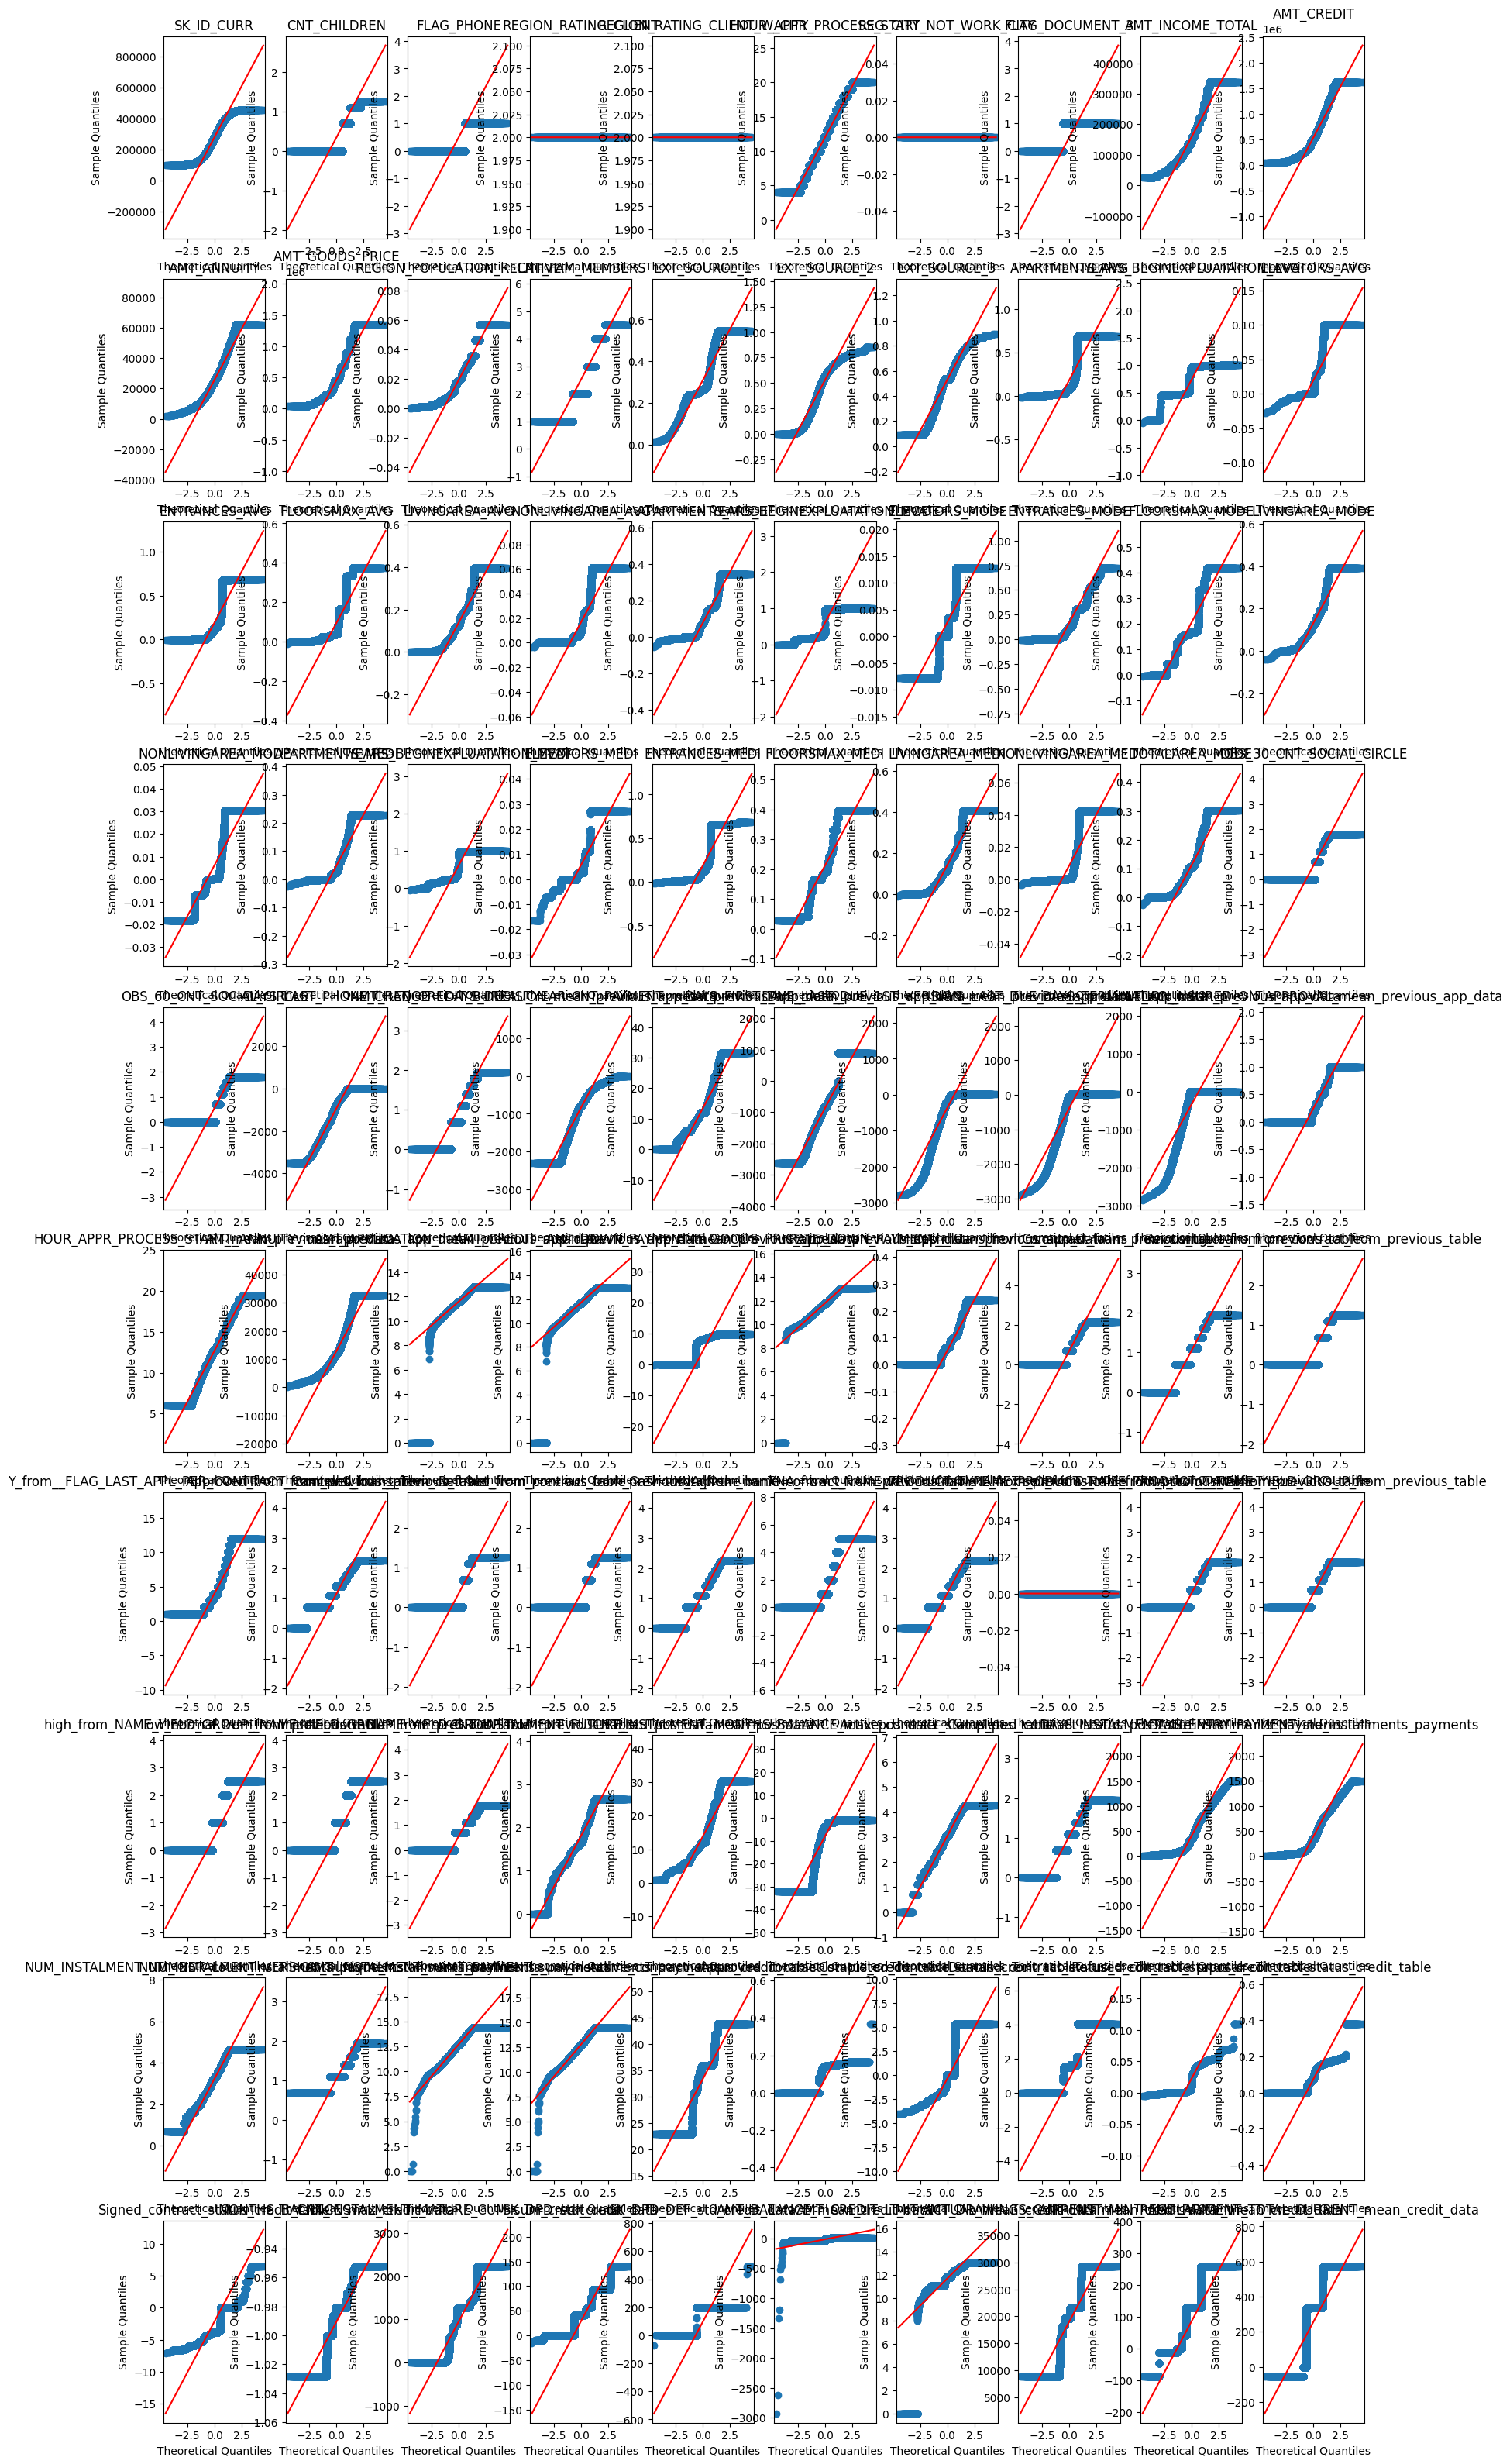

In [39]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
ncols = 10
nrows=10
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20, 40))
i=0
j=0
for col in num_data:
    sm.qqplot(new_app_data[col],fit = False, line='q', ax = axes[i, j])
    axes[i, j].set_title(col)
    if(j<ncols-1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

In [115]:
num_data=new_app_data.select_dtypes(["int64","float64"])
cat_data=new_app_data.select_dtypes(["object"])

# normalization

In [40]:
from sklearn.preprocessing import MinMaxScaler

train_data = num_data.drop(columns=["TARGET"])
y = num_data["TARGET"]

min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(train_data)

min_max_scaled_model = pd.DataFrame(min_max_scaled_data, columns=train_data.columns)

min_max_scaled_model.head()


,SK_ID_CURR,CNT_CHILDREN,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_DECISION_mean_previous_app_data,CNT_PAYMENT_mean_previous_app_data,DAYS_FIRST_DUE_mean_previous_app_data,DAYS_LAST_DUE_1ST_VERSION_mean_previous_app_data,DAYS_LAST_DUE_mean_previous_app_data,DAYS_TERMINATION_mean_previous_app_data,NFLAG_INSURED_ON_APPROVAL_mean_previous_app_data,HOUR_APPR_PROCESS_START_mean_previous_app_data,AMT_ANNUITY_mean_previous_app_data,AMT_APPLICATION_mean_previous_app_data,AMT_CREDIT_mean_previous_app_data,AMT_DOWN_PAYMENT_mean_previous_app_data,AMT_GOODS_PRICE_mean_previous_app_data,RATE_DOWN_PAYMENT_mean_previous_app_data,Cash_loans_from__contract_from_previous_table,Consumer_loans_from_contract_from_previous_table,Revolving_loans_from_contract_from_previous_table,Y_from__FLAG_LAST_APPL_PER_CONTRACT_from_previous_table,Approved_from__contract_from_previous_table,Canceled_loans_from_contract_from_previous_table,Refused_from_contract_from_previous_table,Cash through the bank,XNA_from_name_contract_from_previous_table,XNA_from__NAME_PRODUCT_TYPE_from_previous_table,walk_in_from_NAME_PRODUCT_TYPE_from_previous_table,x-sell_from_NAME_PRODUCT_TYPE_from_previous_table,XNA_from__NAME_YIELD_GROUP_from_previous_table,high_from_NAME_YIELD_GROUP_from_previous_table,low_normal_from_NAME_YIELD_GROUP_from_previous_table,middle_from_NAME_YIELD_GROUP_from_previous_table,CNT_INSTALMENT_FUTURE_std_pos_data,CNT_INSTALMENT_mean_pos_data,MONTHS_BALANCE_max_pos_data,Active_contract_status_pos_table,Completed_contract_status_pos_table,DAYS_INSTALMENT_std_installments_payments,DAYS_ENTRY_PAYMENT_std_installments_payments,NUM_INSTALMENT_NUMBER_count_installments_payments,NUM_INSTALMENT_VERSION_nunique_installments_payments,AMT_INSTALMENT_sum_installments_payments,AMT_PAYMENT_sum_installments_payments,Active_contract_status_credit_table,Approved_contract_status_credit_table,Completed_contract_status_credit_table,Demand_contract_status_credit_table,Refused_contract_status_credit_table,prposal_contract_status_credit_table,Signed_contract_status_credit_table,MONTHS_BALANCE_max_credit_data,CNT_INSTALMENT_MATURE_CUM_sum_credit_data,SK_DPD_std_credit_data,SK_DPD_DEF_std_credit_data,AMT_BALANCE_mean_credit_data,AMT_CREDIT_LIMIT_ACTUAL_mean_credit_data,AMT_DRAWINGS_CURRENT_mean_credit_data,AMT_INST_MIN_REGULARITY_mean_credit_data,AMT_PAYMENT_TOTAL_CURRENT_mean_credit_data,AMT_RECEIVABLE_PRINCIPAL_mean_credit_data,AMT_RECIVABLE_mean_credit_data,AMT_TOTAL_RECEIVABLE_mean_credit_data,CNT_DRAWINGS_CURRENT_mean_credit_data,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,DAYS_ID_PUBLISH_Years,DAYS_BIRTH_YEARS,DAYS_REGISTRATION_Year,DAYS_EMPLOYED_Years
0,0.000000,0.0,1.0,0.5,0.5,0.434783,0.0,1.0,0.001512,0.090287,0.090032,0.077441,0.256321,0.000000,0.072215,0.307542,0.155054,0.037190,0.973613,0.026057,0.079280,0.089410,0.019000,0.003669,0.073666,0.972200,0.037086,0.072818,0.089830,0.054440,0.067445,0.047352,0.973411,0.020865,0.081476,0.096523,0.028096,0.003303,0.040867,0.005747,0.005814,0.735788,0.04,0.793151,0.333333,0.006318,0.007942,0.007764,0.007702,0.000000,0.391304,0.030796,0.044211,0.044211,1.111111e-07,0.044211,0.000008,0.000000,0.022222,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0

In [ ]:
new_app_data=pd.concat([min_max_scaled_model,y],axis=1)

# label and one hot encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
def encoding(df):
    labelencoding = LabelEncoder()
    for col in df.columns:
        if df[col].nunique() > 2:
            df = pd.get_dummies(df, columns=[col], prefix=col, drop_first=False, dtype=int)
        else:
            df[col] = labelencoding.fit_transform(df[col])
    return df

# Example usage
encoded1_df = encoding(cat_data.copy())  
encoded1_df.head()
     

,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_CONTRACT_TYPE,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,

In [42]:
encoded1_df.shape

(307511, 115)

In [45]:
new_app_data=pd.concat([min_max_scaled_model,encoded1_df],axis=1)
new_app_data.head()

,SK_ID_CURR,CNT_CHILDREN,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_DECISION_mean_previous_app_data,CNT_PAYMENT_mean_previous_app_data,DAYS_FIRST_DUE_mean_previous_app_data,DAYS_LAST_DUE_1ST_VERSION_mean_previous_app_data,DAYS_LAST_DUE_mean_previous_app_data,DAYS_TERMINATION_mean_previous_app_data,NFLAG_INSURED_ON_APPROVAL_mean_previous_app_data,HOUR_APPR_PROCESS_START_mean_previous_app_data,AMT_ANNUITY_mean_previous_app_data,AMT_APPLICATION_mean_previous_app_data,AMT_CREDIT_mean_previous_app_data,AMT_DOWN_PAYMENT_mean_previous_app_data,AMT_GOODS_PRICE_mean_previous_app_data,RATE_DOWN_PAYMENT_mean_previous_app_data,Cash_loans_from__contract_from_previous_table,Consumer_loans_from_contract_from_previous_table,Revolving_loans_from_contract_from_previous_table,Y_from__FLAG_LAST_APPL_PER_CONTRACT_from_previous_table,Approved_from__contract_from_previous_table,Canceled_loans_from_contract_from_previous_table,Refused_from_contract_from_previous_table,Cash through the bank,XNA_from_name_contract_from_previous_table,XNA_from__NAME_PRODUCT_TYPE_from_previous_table,walk_in_from_NAME_PRODUCT_TYPE_from_previous_table,x-sell_from_NAME_PRODUCT_TYPE_from_previous_table,XNA_from__NAME_YIELD_GROUP_from_previous_table,high_from_NAME_YIELD_GROUP_from_previous_table,low_normal_from_NAME_YIELD_GROUP_from_previous_table,middle_from_NAME_YIELD_GROUP_from_previous_table,CNT_INSTALMENT_FUTURE_std_pos_data,CNT_INSTALMENT_mean_pos_data,MONTHS_BALANCE_max_pos_data,Active_contract_status_pos_table,Completed_contract_status_pos_table,DAYS_INSTALMENT_std_installments_payments,DAYS_ENTRY_PAYMENT_std_installments_payments,NUM_INSTALMENT_NUMBER_count_installments_payments,NUM_INSTALMENT_VERSION_nunique_installments_payments,AMT_INSTALMENT_sum_installments_payments,AMT_PAYMENT_sum_installments_payments,Active_contract_status_credit_table,Approved_contract_status_credit_table,Completed_contract_status_credit_table,Demand_contract_status_credit_table,Refused_contract_status_credit_table,prposal_contract_status_credit_table,Signed_contract_status_credit_table,MONTHS_BALANCE_max_credit_data,CNT_INSTALMENT_MATURE_CUM_sum_credit_data,SK_DPD_std_credit_data,SK_DPD_DEF_std_credit_data,AMT_BALANCE_mean_credit_data,AMT_CREDIT_LIMIT_ACTUAL_mean_credit_data,AMT_DRAWINGS_CURRENT_mean_credit_data,AMT_INST_MIN_REGULARITY_mean_credit_data,AMT_PAYMENT_TOTAL_CURRENT_mean_credit_data,AMT_RECEIVABLE_PRINCIPAL_mean_credit_data,AMT_RECIVABLE_mean_credit_data,AMT_TOTAL_RECEIVABLE_mean_credit_data,CNT_DRAWINGS_CURRENT_mean_credit_data,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,DAYS_ID_PUBLISH_Years,DAYS_BIRTH_YEARS,DAYS_REGISTRATION_Year,DAYS_EMPLOYED_Years,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_CONTRACT_TYPE,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage

# save data

In [78]:
new_app_data.to_csv('model_data.csv', index=False)
